##Aprendizaje Estadistico
###Andrés López Echeverri

# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















In [28]:
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 1) ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [29]:
Pinguinos = list(df['species'].unique())
print(Pinguinos)
print(f"El numero de especies diferentes de pinguino es {len(Pinguinos)}")
print(f"Caracteristicas: {list(df.columns)}")

['Adelie', 'Chinstrap', 'Gentoo']
El numero de especies diferentes de pinguino es 3
Caracteristicas: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


Las caracteristicas son:


*   Especie
*   Isla
*   Longitud del Pico
*   Profundidad del Pico
*   Longitud de la aleta
*   Masa corporal
*   Sexo



###2) ¿Hay valores faltantes en las variables? Determine una estrategia de limpieza y apliquela.

Los valores faltantes se observan en el sig dataframe (NaN)

In [30]:
nans = df[df.isna().any(axis=1)]
nans

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [31]:
#limpieza
df = df.dropna().reset_index(drop=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### 3) ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

In [32]:
df.groupby('island').count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,163,163,163,163,163,163
Dream,123,123,123,123,123,123
Torgersen,47,47,47,47,47,47


La isla con mayor numero de pinguinos en el dataset es la isla Biscoe, si hay un desbalance, pues hay una notable diferencia en el numero de pinguinos por isla, la isla Biscoe tiene 40 pinguinos mas que la isla Dream y mas del triple de pinguinos en el dataset que la isla Torgersen.

### 4) Repita la pregunta anterior observando las especies.

In [33]:
df.groupby(['species']).count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


Hay mas pinguinos de la especie Adelie en el dataset, si hay un desbalance pues hay una notable diferencia, hay ~30 pinguinos mas de la especie Adelie que de la especia Gentoo y mas del doble de pinguinos de la especie Adelie que de la especie Chinstrap.

##Tendencias y visualizacion de las variables

### 5)¿Cuál es la longitud media y la desviacion estandar del tamaño del pico de los pingüinos por especie?

Longitud media del pico por especie

In [35]:
df["bill_length_mm"].groupby(df["species"]).mean()

,bill_length_mm
species,
Adelie,38.823973
Chinstrap,48.833824
Gentoo,47.568067


Desviación estandar de la longitud del pico por especie

In [36]:
df["bill_length_mm"].groupby(df["species"]).std()

,bill_length_mm
species,
Adelie,2.662597
Chinstrap,3.339256
Gentoo,3.106116


### 6) ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [37]:
df["bill_length_mm"].groupby(df["species"]).max()

,bill_length_mm
species,
Adelie,46.0
Chinstrap,58.0
Gentoo,59.6


In [113]:
print("El pinguino con pico mas largo es el siguiente:")
df[df["bill_length_mm"] == 59.6]

El pinguino con pico mas largo es el siguiente:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
246,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


El pinguino con el pico mas largo del datset es de la especie Gentoo

### 7)¿Como es la distribución de la masa corporal entre las especies de pingüinos?

In [39]:
Adelie = df[df["species"]=="Adelie"]
Chinstrap = df[df["species"]=="Chinstrap"]
Gentoo = df[df["species"]=="Gentoo"]

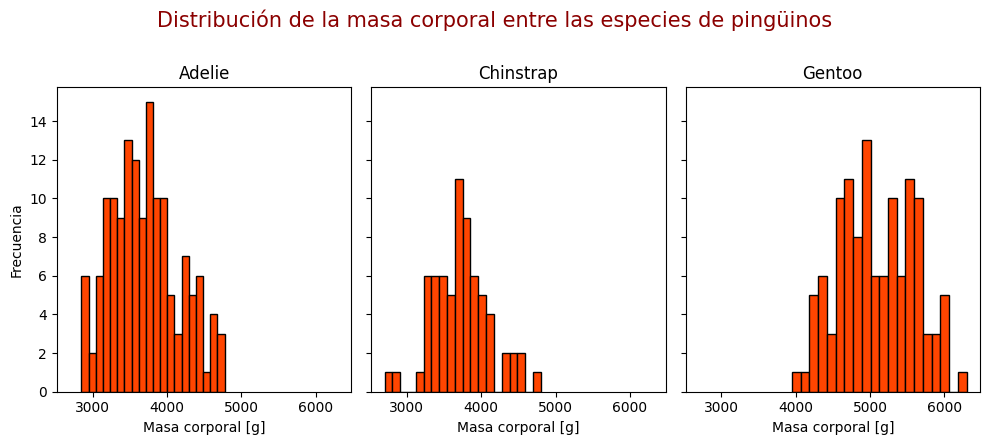

In [40]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(10, 4),sharey=True,sharex=True)

ax = axs[0]
ax.hist(Adelie['body_mass_g'],color='orangered',edgecolor='k',bins=20)
ax.set_title('Adelie')
ax.set_xlabel('Masa corporal [g]')
ax.set_ylabel('Frecuencia')

ax = axs[1]
ax.hist(Chinstrap['body_mass_g'],color='orangered',edgecolor='k',bins=20)
ax.set_title('Chinstrap')
ax.set_xlabel('Masa corporal [g]')

ax = axs[2]
ax.hist(Gentoo['body_mass_g'],color='orangered',edgecolor='k',bins=20)
ax.set_title('Gentoo')
ax.set_xlabel('Masa corporal [g]')

plt.tight_layout()
#titulo general
fig.suptitle('Distribución de la masa corporal entre las especies de pingüinos',y=1.1,color='darkred',size=15)
plt.show()

### 8) Describa la distribucion con ayuda de la media, desviacion estandard

In [41]:
especies = df.groupby('species').describe()
especies['body_mass_g']

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


*   Adelie
La media de la distribución de masas corporales se encuentra en 3706.164384 gramos y la desviación estandar es de 458.620135.

*   Chinstrap
La media de la distribución de masas corporales se encuentra en 3733.088235 gramos y la desviación estandar es de 384.335081.

*   Gentoo
La media de la distribución de masas corporales se encuentra en 5092.436975 gramos y la desviación estandar es de 501.476154.

A partir de esto esperamos que la masa corporal de un pinguinos Gentoo sea mayor a la de un pinguino de cualquiera de las otras dos especies la mayoría de las veces. Además podemos notar que la especie con masas menos dispersas es Chinstrap mientras que la que tiene mayor dispersión es la especie Gentoo.

#### 9) ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [42]:
sexos = df.groupby('sex').describe()
sexos['body_mass_g']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


In [115]:
#diferencia promedio
print("la diferencia del promedio es")
float(sexos['body_mass_g']['mean']['Male']-sexos['body_mass_g']['mean']['Female'])

la diferencia del promedio es


683.4117965367964

In [116]:
#diferencia desviación estandar
print("la diferencia de la desviación estandar es")
float(sexos['body_mass_g']['std']['Male']-sexos['body_mass_g']['std']['Female'])

la diferencia de la desviación estandar es


121.45683464202978

La masa corporal promedio de los machos es mayor que la masa corporal promedio de las hembras y la desviación estandar de los machos también es mayor que la de las hembras.

Veamos una grafica comparativa:

In [45]:
male = df[df['sex'] == 'Male']
female = df[df['sex'] == 'Female']

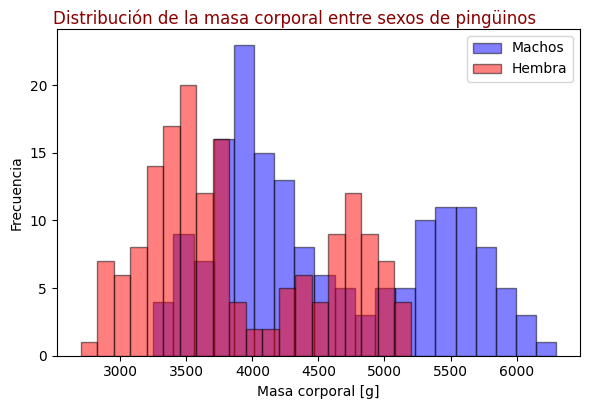

In [46]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4),sharey=True,sharex=True)

ax=axs
ax.hist(male['body_mass_g'],color='blue',edgecolor='k',bins=20,alpha=0.5)
ax.hist(female['body_mass_g'],color='red',edgecolor='k',bins=20,alpha=0.5)
ax.set_xlabel('Masa corporal [g]')
ax.set_ylabel('Frecuencia')
ax.legend(['Machos','Hembra'])

plt.tight_layout()
fig.suptitle('Distribución de la masa corporal entre sexos de pingüinos',y=1.01,color='darkred',size=12)
plt.show()

### 10) ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [47]:
especies['flipper_length_mm'][['mean','std']]

,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


Por especie, la media de la longitud de las aletas de la especie Gentoo es mayor que la de las demás especies, de **217.24 mm**, seguida por la longitud de las aletas de la especie Chinstrap, de **195.82 mm**, y finalmente la especie Adelie, con una longitud de aletas de **190.10 mm**.

Las desviaciones estandar de Chinstrap, Gentoo y Adelie son respectivamente: **7.13**, **6.59**, **6.52**.

### 11) ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [48]:
especies['flipper_length_mm'][['min','max']]

,min,max
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


La longitud maxima de aleta entre las tres especies la tiene un pinguino de la especie Gentoo, de 231 mm, y la longitud minima entre las tres especies la tiene un pinguino de la especie Adelie, de 172 mm.

### 12) ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?



Para observar como varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas vamos a agrupar por isla y luego especie y luego obtener la desviación estandar de longitud de pico

In [49]:
isl_spc = df.groupby(['island','species']).describe()
picos = isl_spc['bill_length_mm'][['std','mean']]
picos

std       mean
island    species                       
Biscoe    Adelie     2.480916  38.975000
          Gentoo     3.106116  47.568067
Dream     Adelie     2.484276  38.520000
          Chinstrap  3.339256  48.833824
Torgersen Adelie     3.028097  39.038298

Se observa que entre islas no cambia mucho el promedio del tamaño de pico entre miembros de la misma especie (Adelie), en las tres islas donde se encuentra es de alrededor de 39 mm, la desviación estandar si es un poco mayor (no mucho) en la isla de torgersen para Adelie en comparación con las otras islas para la misma especie.


### 13) ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

En la tabla puede observar como varía la longitud del pico entre las diferentes especies de pinguinos en las diferentes islas. La de mayor variación sería la especie Chinstrap en la isla Dream y la de menor la especie Adelie en la isla Biscoe.

#### 14) ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.



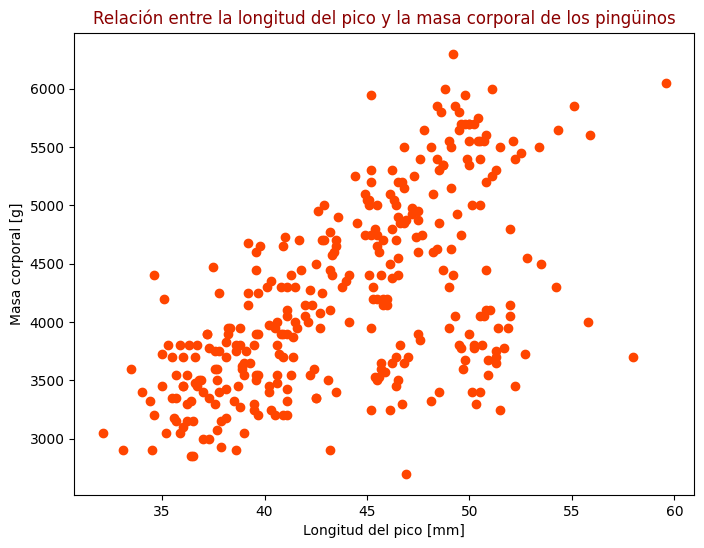

In [50]:
fig = plt.figure(figsize=(8, 6))

df14 = df[['species','body_mass_g','bill_length_mm']]

plt.scatter(df14['bill_length_mm'], df14['body_mass_g'],color='orangered')

plt.xlabel('Longitud del pico [mm]')
plt.ylabel('Masa corporal [g]')
plt.title('Relación entre la longitud del pico y la masa corporal de los pingüinos',color='darkred')
plt.show()

Como se observa hay una tendencia hacía mayores masas mientras mayor es el pico

In [51]:
corr = df14['body_mass_g'].corr(df14['bill_length_mm'])
print(f"La correlación entre la longitud del pico y la masa corporal es de {corr}")

La correlación entre la longitud del pico y la masa corporal es de 0.589451110176949


Esto es una correlación positiva moderada, cuando una de las variables aumenta la otra aumenta también

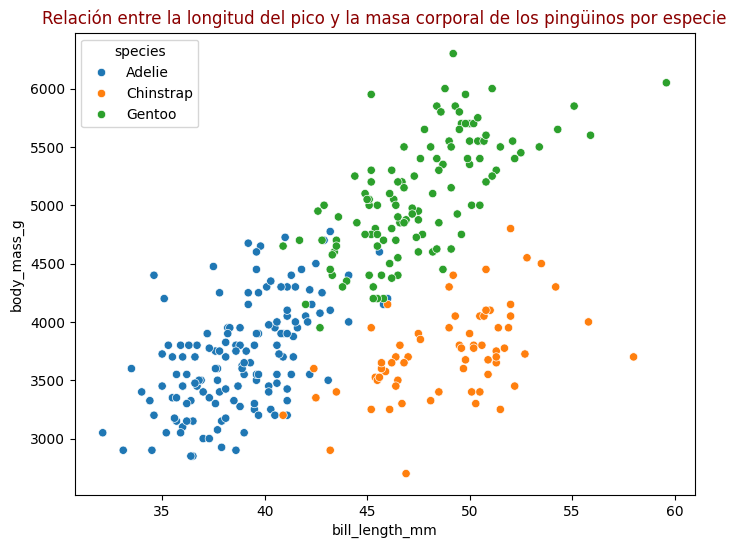

In [52]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')
plt.title('Relación entre la longitud del pico y la masa corporal de los pingüinos por especie',color='darkred')
plt.show()

La relación de que a mayor masa el pico crece se mantiene para cada especie aunque la pendiente es mas pronunciada para las especies Chinstrap y Gentoo. La tendencia es mas clara para las especies tipo Gentoo

### 15) ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?



In [53]:
corr = df.groupby('species').apply(lambda g: g['body_mass_g'].corr(g['bill_length_mm']),include_groups=False)
corr

,0
species,
Adelie,0.544276
Chinstrap,0.513638
Gentoo,0.666730


Para cada especie se tiene una correlación positiva moderada, nos es tan significativa, pero es suficiente como para que exista una tendencia clara entre las variables. La que tiene una correlación mas fuerte es la especie Gentoo, como era de esperarse por la tendencia mas marcada observada en la grafica

### 16) ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

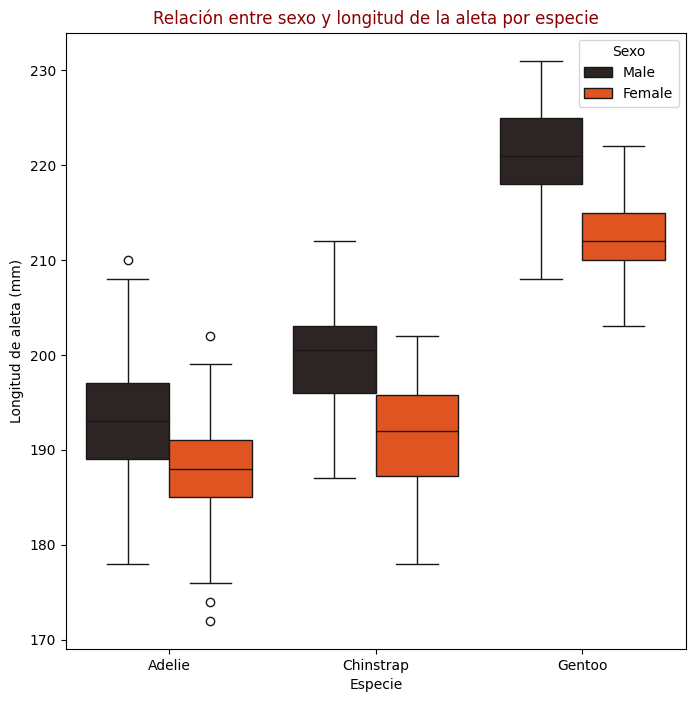

In [54]:
plt.figure(figsize=(8, 8))

sns.boxplot(data=df, x="species", y="flipper_length_mm", hue="sex",palette='dark:orangered')

plt.title("Relación entre sexo y longitud de la aleta por especie",color='darkred')
plt.ylabel("Longitud de aleta (mm)")
plt.xlabel("Especie")
plt.legend(title="Sexo")
plt.show()

Se observa que en machos la longitud media del pico es mas larga en todas las especies, con una mayor diferencia en la especie Gento entre la longitud del pico de la hembra y el macho.

### 17) Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Vamos a utilizar la masa corporal y el tamaño de las aletas para la especie Gentoo

$H_0$: No existe correlación entre la masa corporal y el tamaño de las aletas.

$H_A$: Existe relación lineal entre la masa corporal y la longitud del pico.

In [81]:
from scipy.stats import norm
import numpy as np

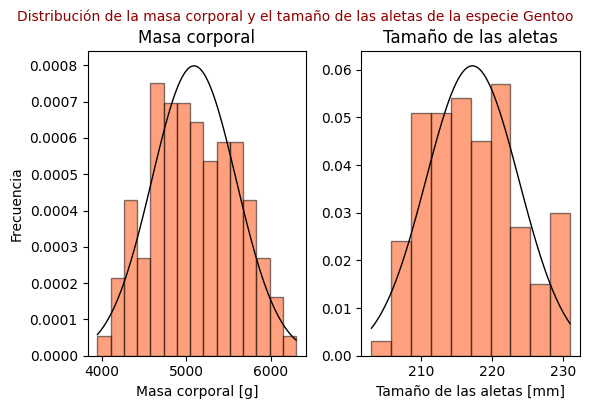

In [103]:
#Histograma de los valores a comparar
fig, axs = plt.subplots(1, 2, figsize=(6, 4))
#body mass y flipper length
ax = axs[0]
ax.hist(Gentoo['body_mass_g'],color='orangered',edgecolor='k',bins=15,alpha=0.5,density=True)
ax.set_title('Masa corporal')
ax.set_xlabel('Masa corporal [g]')
ax.set_ylabel('Frecuencia')
mu, std = norm.fit(Gentoo['body_mass_g'])
xmin, xmax = Gentoo['body_mass_g'].min(), Gentoo['body_mass_g'].max()
x = np.linspace(xmin,xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=1)

ax = axs[1]
ax.hist(Gentoo['flipper_length_mm'],color='orangered',edgecolor='k',bins=10,alpha=0.5,density=True)
ax.set_title('Tamaño de las aletas')
ax.set_xlabel('Tamaño de las aletas [mm]')
mu, std = norm.fit(Gentoo['flipper_length_mm'])
xmin, xmax = Gentoo['flipper_length_mm'].min(), Gentoo['flipper_length_mm'].max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=1)
plt.tight_layout()
fig.suptitle('Distribución de la masa corporal y el tamaño de las aletas de la especie Gentoo',y=1.01,color='darkred',size=10)
plt.show()


Si no somos muy rigurosos ambas distribuciones se aproximan a una normal, por lo que podemos aplicar un test de hipotesis de pearsonr en este caso para obtener el p_value directamente. Se rechaza la hipotesis nula si $p_{value}$<$\alpha$  siendo $\alpha$ el nivel de significancia que tomaremos como $\alpha$=0.5.

In [70]:
import scipy.stats as stats
# Test de correlación de Pearson
r, p_value = stats.pearsonr(Gentoo["body_mass_g"], Gentoo["flipper_length_mm"])

print(f"Coeficiente de correlación: r = {r:.2f}")
print(f"Valor p: {p_value:.20f}")

Coeficiente de correlación: r = 0.71
Valor p: 0.00000000000000000012


Como puede notar el pvalue es muy bajo, muy cercano a cero, por lo tanto mucho menor a $\alpha$, es decir que se rechaza la hipotesis nula (No existe correlación entre la masa corporal y el tamaño de las aletas), por lo que se concluye que si existe correlación entre la masa corporal y el tamaño de las aletas, y esta correlación no se debe a la aleatoriedad.